# Echotop weather data

This notebook gives an example of reading and plotting echo top convective weather data from the National Corridor Integrated Weather System (CIWS) data product.

## Prerequisites

The [`netCDF4`](https://unidata.github.io/netcdf4-python/netCDF4/index.html) package is used to read from the weather data files.  It can be installed directly using Anaconda or pip.

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a tool that can be used for producing maps, and it handles the projection format used in the weather data.  The easiest method is to install directly using Anaconda.  This should automatically include all of its binary dependencies.  Alternatively, to install via pip, it may be necsesary to install its dependencies separately.  On Ubuntu 18, the following commands have been used for installing via pip:
```
sudo apt install proj-bin libproj-dev libgeos-3.6.2 libgeos++-dev
pip3 install shapely cartopy --no-binary shapely --no-binary cartopy
```

## Read the weather data

Fist, we use the `netCDF4` package to read in the weather data.  Instead of typing out the full file name, we use `glob` to build a list of all files in the directory, and then we read the first file from the list.

In [1]:
import netCDF4
import glob
import os

data_dir = 'echo_top_sample/20190131ET'

data_files = glob.glob(os.path.join(data_dir, '*.nc'))

data = netCDF4.Dataset(data_files[0])

We can get some summary information about the data set by simply using `print`:

In [2]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.3
    history: File created 2019-01-31T20:52:38Z on machine ciwsa071 by ProductAdapterEchoTop 1.0.0
    institution: Data produced by the MIT Lincoln Lab Weather Sensing Group
    references: http://www.wx.ll.mit.edu
    source: CIWS National Data Stream: MosTileAsm:Mosaic:CiwsRelay
    title: CIWS National Echo Top Mosaic Product - 1 km @ 2.5 minutes
    comment: Echo Top derived from a mosaic of NEXRAD, TDWR and Canadian radar systems.
    FileType: NetCDF
    FileFormat: Netcdf4
    dimensions(sizes): time(1), z0(1), y0(3520), x0(5120), xml_metadata_len(49000)
    variables(dimensions): float64 time(time), float64 z0(z0), float64 y0(y0), float64 x0(x0), float64 start_time(), float64 stop_time(), int32 grid_mapping0(), |S1 xml_metadata(xml_metadata_len), int8 ECHO_TOP(time, z0, y0, x0), int8 ECHO_TOP_FLAGS(time, z0, y0, x0)
    groups: 


We can also view information about the projection that is used to represent the data coordinates:

In [3]:
print(data['grid_mapping0'])

<class 'netCDF4._netCDF4.Variable'>
int32 grid_mapping0()
    grid_mapping_name: lambert_azimuthal_equal_area
    long_name: Lambert Azimuthal Equal Area Projection
    latitude_of_projection_origin: 38.0
    longitude_of_projection_origin: -98.0
    false_easting: 0.0
    false_northing: 0.0
    earth_radius: 6370997.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


## Plotting the weather data

Next, we use Cartopy to plot the weather values (in this case, convective cloud top altitude) on a map.  This is very simple, as the Cartopy package automatically takes care of handling the projections for us.  First we retrieve the parameters of the projection from the data file; these will be passed to Cartopy when we create the plotting axes:

In [4]:
central_longitude = data['grid_mapping0'].longitude_of_projection_origin
central_latitude = data['grid_mapping0'].latitude_of_projection_origin

Import the packages that will be used:

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Set up the figure, specify the projection associated with the weather data, and create a contour plot of the convective cloud top altitude data:

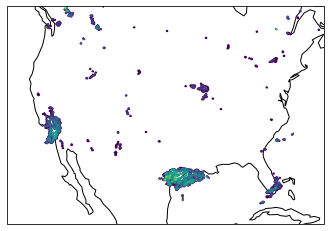

In [6]:
# Set up the figure and specify the projection associated with the weather data:
f = plt.figure()
ax = f.add_subplot(111, projection=ccrs.LambertAzimuthalEqualArea(central_longitude=central_longitude, central_latitude=central_latitude))

# Now we add a background to the map.  Coastlines or a "stock image" can be used.

ax.coastlines(resolution="110m") # Default "auto" resolution may hang trying to downlad data when zoomed in around the US
# ax.stock_img() # An alternative background

stride = 10 # Downsample the data to reduce memory usage and plotting time
X, Y = np.meshgrid(data['x0'][::stride], data['y0'][::stride])
ax.contour(X, Y, data['ECHO_TOP'][0,0,::stride,::stride])